In [1]:
!pip install -U datasets
!pip install wordcloud
!pip install -U transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 89.3 MB/s eta 0:00:00
  

In [2]:
from datasets import load_dataset

In [3]:
dataset = load_dataset("EdinburghNLP/xsum")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

xsum.py:   0%|          | 0.00/5.76k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/304M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/16.7M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/17.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/204045 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11332 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11334 [00:00<?, ? examples/s]

In [4]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
train = dataset['train'].select(range(1000))
df= train['document']
train_df = dataset["train"].to_pandas()
print(train_df.isnull().sum())

document    0
summary     0
id          0
dtype: int64


In [6]:
duplicate_rows = train_df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In [7]:
comment_words = ''
stopwords = set(STOPWORDS)

In [8]:
j = 0
for val in df:
    j=j+ 1

    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

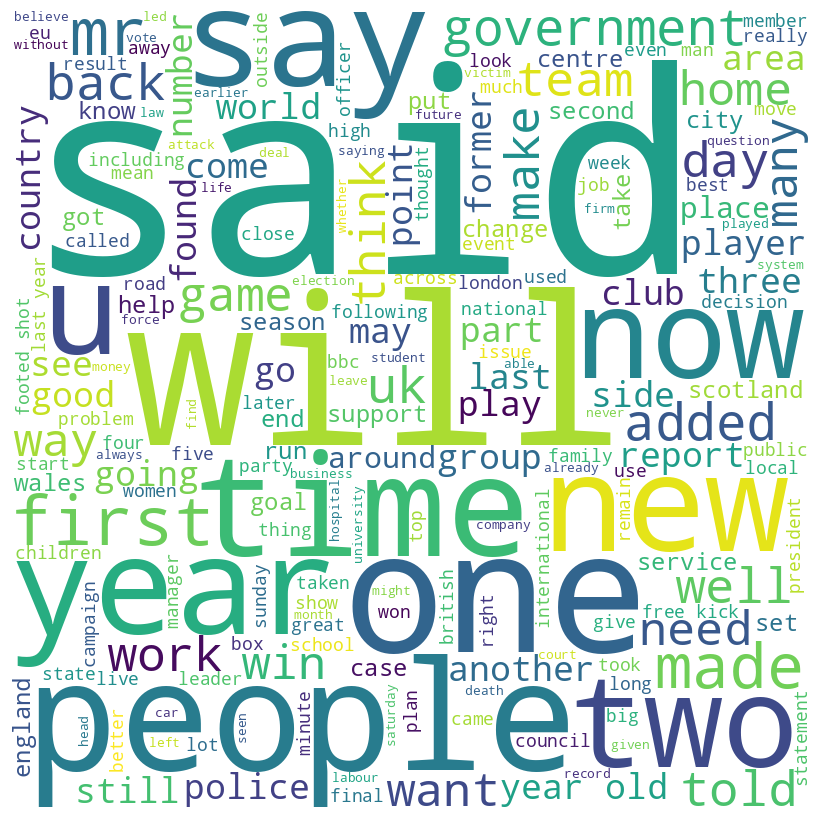

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
plt.savefig('word_cloud1.png')

In [10]:
data = dataset['train']
doc_lengths = [len(doc.split()) for doc in data["document"]]
sum_lengths = [len(summary.split()) for summary in data["summary"]]

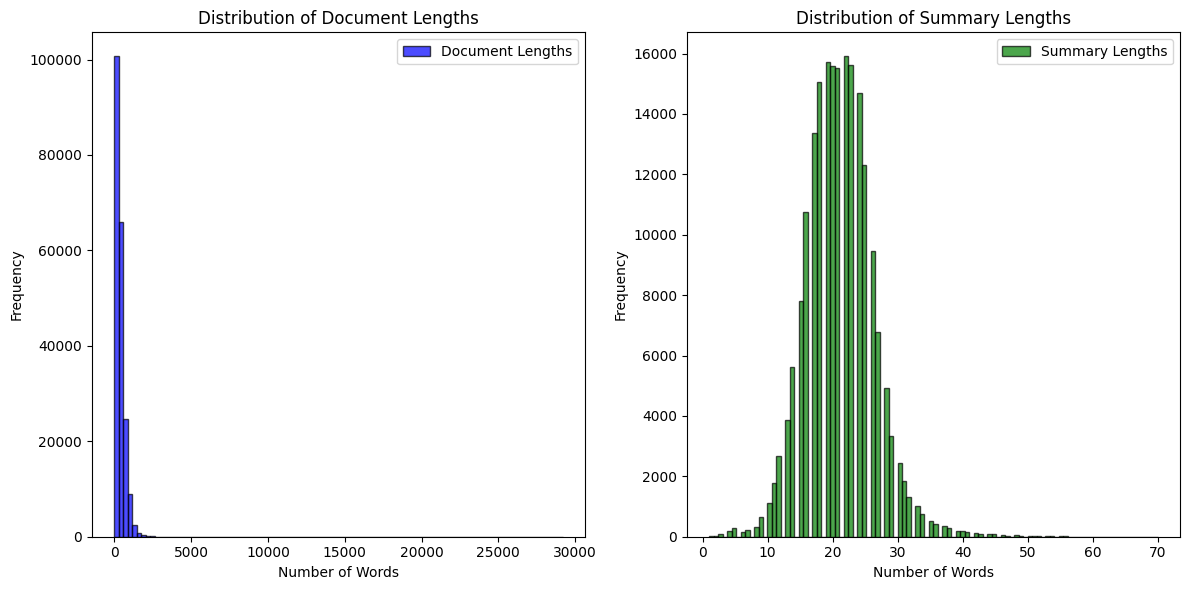

In [11]:
plt.figure(figsize=(12, 6))

# Document lengths
plt.subplot(1, 2, 1)
plt.hist(doc_lengths, bins=100, color="blue", alpha=0.7, label="Document Lengths", edgecolor="black")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Distribution of Document Lengths")
plt.legend()

# Summary lengths
plt.subplot(1, 2, 2)
plt.hist(sum_lengths, bins=100, color="green", alpha=0.7, label="Summary Lengths", edgecolor="black")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Distribution of Summary Lengths")
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
from datasets import DatasetDict

In [13]:
from datasets import load_dataset

new_dataset = DatasetDict({
    "train": dataset['train'].shuffle(seed = 42).select(range(30000)),
    "validation": dataset['validation'].shuffle(seed = 43).select(range(2000)),
    "test":dataset['test'].shuffle(seed = 43).select(range(2000)),
})

In [14]:

new_dataset

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 30000
    })
    validation: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 2000
    })
})

In [35]:

def preprocess_function(data):
    inputs = tokenizer(
        data["document"],
        max_length=4096,
        truncation=True,
        padding="max_length"
    )
    targets = tokenizer(
        data["summary"],
        max_length=128,
        truncation=True,
        padding="max_length"
    )
    inputs["labels"] = targets["input_ids"]
    return inputs

In [36]:

def preprocess_functionT5(data):
    inputs = tokenizer(
        data["document"],
        max_length=4096,
        truncation=True,
        padding="max_length"
    )
    targets = tokenizer(
        data["summary"],
        max_length=128,
        truncation=True,
        padding="max_length"
    )
    inputs["labels"] = targets["input_ids"]
    return inputs

In [16]:
from transformers import LEDTokenizer, LEDForConditionalGeneration, Trainer, TrainingArguments
tokenizer = LEDTokenizer.from_pretrained("allenai/led-base-16384")
model = LEDForConditionalGeneration.from_pretrained("allenai/led-base-16384")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/648M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

In [17]:
tokenized_dataset = new_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/30000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [18]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 30000
    })
    validation: Dataset({
        features: ['document', 'summary', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['document', 'summary', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2000
    })
})

In [28]:
from transformers import AutoTokenizer,T5ForConditionalGeneration

checkpoint = "google-t5/t5-small"
model1 = T5ForConditionalGeneration.from_pretrained(checkpoint)
tokenizer1 = AutoTokenizer.from_pretrained(checkpoint)

In [37]:
tokenized_datasetT5 = new_dataset.map(preprocess_functionT5, batched=True)

Map:   0%|          | 0/30000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [38]:
tokenized_datasetT5

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 30000
    })
    validation: Dataset({
        features: ['document', 'summary', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['document', 'summary', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2000
    })
})

In [39]:
train = tokenized_dataset["train"].to_pandas()
train.drop(columns='id', axis = 1, inplace = True)
train.head()

,document,summary,input_ids,attention_mask,labels
0,"In Wales, councils are responsible for funding...",As Chancellor George Osborne announced all Eng...,"[0, 1121, 5295, 6, 14751, 32, 2149, 13, 1435, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1620, 8948, 1655, 17093, 585, 70, 2370, 19..."
1,"Up to 100,000 youngsters will be eligible for ...",Discounted bus tickets for 16 to 18 year olds ...,"[0, 10926, 7, 727, 6, 151, 13692, 40, 28, 4973...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 41615, 12825, 196, 2353, 3308, 13, 545, 7,..."
2,Middlesbrough and Brighton face each other on ...,"""The winner takes it all, the loser has to fal...","[0, 448, 40741, 428, 10344, 8, 11946, 652, 349...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 113, 133, 1924, 1239, 24, 70, 6, 5, 22650,..."
3,"Money allocated to children's centres, which p...",Support for vulnerable children in England is ...,"[0, 25256, 12971, 7, 408, 18, 7872, 6, 61, 694...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 38873, 13, 4478, 408, 11, 1156, 16, 23, 81..."
4,"Both sides have overlapping claims in the sea,...",The Philippines has submitted evidence to a UN...,"[0, 16991, 2380, 33, 35642, 1449, 11, 5, 3342,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 133, 5639, 34, 4813, 1283, 7, 10, 2604, 16..."


In [40]:
traint5 = tokenized_datasetT5["train"].to_pandas()
traint5.drop(columns='id', axis = 1, inplace = True)
traint5.head()

,document,summary,input_ids,attention_mask,labels
0,"In Wales, councils are responsible for funding...",As Chancellor George Osborne announced all Eng...,"[0, 1121, 5295, 6, 14751, 32, 2149, 13, 1435, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1620, 8948, 1655, 17093, 585, 70, 2370, 19..."
1,"Up to 100,000 youngsters will be eligible for ...",Discounted bus tickets for 16 to 18 year olds ...,"[0, 10926, 7, 727, 6, 151, 13692, 40, 28, 4973...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 41615, 12825, 196, 2353, 3308, 13, 545, 7,..."
2,Middlesbrough and Brighton face each other on ...,"""The winner takes it all, the loser has to fal...","[0, 448, 40741, 428, 10344, 8, 11946, 652, 349...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 113, 133, 1924, 1239, 24, 70, 6, 5, 22650,..."
3,"Money allocated to children's centres, which p...",Support for vulnerable children in England is ...,"[0, 25256, 12971, 7, 408, 18, 7872, 6, 61, 694...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 38873, 13, 4478, 408, 11, 1156, 16, 23, 81..."
4,"Both sides have overlapping claims in the sea,...",The Philippines has submitted evidence to a UN...,"[0, 16991, 2380, 33, 35642, 1449, 11, 5, 3342,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 133, 5639, 34, 4813, 1283, 7, 10, 2604, 16..."


In [41]:
btrain = new_dataset["train"].to_pandas()
btrain.head()

,document,summary,id
0,"In Wales, councils are responsible for funding...",As Chancellor George Osborne announced all Eng...,35821725
1,"Up to 100,000 youngsters will be eligible for ...",Discounted bus tickets for 16 to 18 year olds ...,40302059
2,Middlesbrough and Brighton face each other on ...,"""The winner takes it all, the loser has to fal...",36192574
3,"Money allocated to children's centres, which p...",Support for vulnerable children in England is ...,32831331
4,"Both sides have overlapping claims in the sea,...",The Philippines has submitted evidence to a UN...,26781682
